In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/mo

In [6]:
num_training = mnist_data.train.num_examples
num_validation = mnist_data.validation.num_examples
num_test = mnist_data.test.num_examples
print("Train {} Test {} Validation {}".format(num_training,num_test,num_validation))

Train 55000 Test 10000 Validation 5000


In [0]:
n_input = 784
n_hidden_1 = 512
n_hidden_2 = 256
n_hidden_3 = 128
n_output = 10

In [0]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [0]:
X = tf.placeholder(tf.float32,[None,n_input])
Y = tf.placeholder(tf.float32, [None,n_output])

In [0]:
nn_weights = {
    "W1" : tf.Variable(tf.truncated_normal([n_input,n_hidden_1],stddev=0.1)),
    "W2" : tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2],stddev=0.1)),
    "W3" : tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3],stddev=0.1)),
    "Wout" : tf.Variable(tf.truncated_normal([n_hidden_3,n_output],stddev=0.1)),
}
nn_bias = {
    "B1" : tf.Variable(tf.truncated_normal([n_hidden_1])),
    "B2" : tf.Variable(tf.truncated_normal([n_hidden_2])),
    "B3" : tf.Variable(tf.truncated_normal([n_hidden_3])),
    "B4" : tf.Variable(tf.truncated_normal([n_output]))
}

In [15]:
nn_layer_1 = tf.add(tf.matmul(X,nn_weights["W1"]),nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1,nn_weights["W2"]),nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2,nn_weights["W3"]),nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3,keep_prob)
output_layer = tf.add(tf.matmul(layer_drop,nn_weights["Wout"]), nn_bias["B4"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer,labels=Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

prediction = tf.equal(tf.argmax(output_layer,1),tf.argmax(Y,1))

nn_accuracy = tf.reduce_mean(tf.cast(prediction,tf.float32))

init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [17]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):
    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)
    sess.run(optimizer, feed_dict = { X : mini_batch_x, Y : mini_batch_y , keep_prob : 1})

    if not i%100  :
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss,nn_accuracy], feed_dict = { X : mini_batch_x, Y : mini_batch_y , keep_prob : 1 })
      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss,nn_accuracy], feed_dict = { X : mini_batch_val_x, Y : mini_batch_val_y , keep_prob : 1 })

      print("Iteration {} Train_Loss {} Train_accuracy {} Val_Loss {} Val_accuracy {}".format(i,mini_batch_loss,mini_batch_accuracy,mini_batch_val_loss,mini_batch_val_accuracy))

  print("OPtimization Finished")
  test_accuracy = sess.run(nn_accuracy,feed_dict = { X : mnist_data.test.images , Y : mnist_data.test.labels, keep_prob : 1.0})
  print("Test accuracy is {}".format(test_accuracy))

  saver_path = saver.save(sess,"./model/my_model.ckpt")

Iteration 0 Train_Loss 6.309386253356934 Train_accuracy 0.015625 Val_Loss 6.657808303833008 Val_accuracy 0.0390625
Iteration 100 Train_Loss 3.0956554412841797 Train_accuracy 0.15625 Val_Loss 3.018744945526123 Val_accuracy 0.1328125
Iteration 200 Train_Loss 2.7160544395446777 Train_accuracy 0.1796875 Val_Loss 2.5835325717926025 Val_accuracy 0.1875
Iteration 300 Train_Loss 2.351191997528076 Train_accuracy 0.234375 Val_Loss 2.243969440460205 Val_accuracy 0.2578125
Iteration 400 Train_Loss 2.244586229324341 Train_accuracy 0.2890625 Val_Loss 2.0921599864959717 Val_accuracy 0.28125
Iteration 500 Train_Loss 1.9810092449188232 Train_accuracy 0.3828125 Val_Loss 2.0630664825439453 Val_accuracy 0.265625
Iteration 600 Train_Loss 1.8371949195861816 Train_accuracy 0.390625 Val_Loss 1.832929253578186 Val_accuracy 0.3984375
Iteration 700 Train_Loss 1.6277767419815063 Train_accuracy 0.4765625 Val_Loss 1.5840253829956055 Val_accuracy 0.390625
Iteration 800 Train_Loss 1.7589728832244873 Train_accuracy 0.

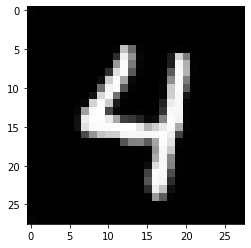

INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt
Prediction for test image is [4]


In [23]:
img = cv2.imread("test4.jpg")
gray_image =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

rescaled_img =cv2.resize(gray_image,(28,28))
plt.imshow(rescaled_img, cmap="gray")
plt.show()
rescaled_img.shape

dum = rescaled_img.reshape(1,-1)/255
dum.reshape

with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  z = output_layer.eval(feed_dict = {X : dum,keep_prob : 1.0})
  y_pred = np.argmax(z,axis=1)
  print("Prediction for test image is {}".format(y_pred))